# 6.3 Geographic Visualization

### This script contains:
#### 1. Import Data and Libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth map

### 1. Import data and libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import geopandas

In [5]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [7]:
#define path for superstore_project
path = r'C:/users/localadmin/global_superstore_project'

In [9]:
path

'C:/users/localadmin/global_superstore_project'

In [11]:
# importing geojson file for global countries
country_geojson = r'C:\users\localadmin\Downloads\countries.geo.json'

In [13]:
country_geojson

'C:\\users\\localadmin\\Downloads\\countries.geo.json'

In [15]:
# To see the geojson file contents
f = open(r'C:/users/localadmin/global_superstore_project//countries.geo.json')
# Returns json object as a dictionary
country_geojson = json.load(f)
#Iterating through the geojson list
for i in country_geojson['features']:
    print(i)

{'type': 'Feature', 'id': 'AFG', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388]

In [14]:
country_geojson.keys()

dict_keys(['type', 'features'])

In [17]:
#importing procesed superstore data as gs_store
gs_store = pd.read_csv(os.path.join(path,'Data', 'processed_data', 'superstore_cleaned.csv'))

In [19]:
#checking the shape of gs_store dataframe
gs_store.shape

(51290, 27)

In [21]:
#checking the head of the gs_store dataframe
gs_store.head()

Unnamed: 0 product_category         city        country customer_id  \
0           0  Office Supplies  Los Angeles  United States   LS-172304   
1           1  Office Supplies  Los Angeles  United States   MV-174854   
2           2  Office Supplies  Los Angeles  United States   CS-121304   
3           3  Office Supplies  Los Angeles  United States   CS-121304   
4           4  Office Supplies  Los Angeles  United States   AP-109154   

      customer_name  discount market order_date        order_id  ... sales  \
0  Lycoris Saunders       0.0     US    00:00.0  CA-2011-130813  ...    19   
1     Mark Van Huff       0.0     US    00:00.0  CA-2011-148614  ...    19   
2      Chad Sievert       0.0     US    00:00.0  CA-2011-118962  ...    21   
3      Chad Sievert       0.0     US    00:00.0  CA-2011-118962  ...   111   
4    Arthur Prichep       0.0     US    00:00.0  CA-2011-146969  ...     6   

    segment ship_date       ship_mode  shipping_cost       state  \
0  Consumer   00:00.0    Second Class           4.37  California   
1  Consumer   00:00.0  Standard Class           0.94  California   
2  Consumer   00:00.0  Standard Class           1.81  California   
3  Consumer   00:00.0  Standard Class           4.59  California   
4  Consumer   00:00.0  Standard Class           1.32  California   

   sub_category  year        market2 week_num  
0         Paper  2011  North America        2  
1         Paper  2011  North America        4  
2         Paper  2011  North America       32  
3         Paper  2011  North America       32  
4         Paper  2011  North America       40  

[5 rows x 27 columns]

In [23]:
#Checking the gs_store columns
gs_store.columns

Index(['Unnamed: 0', 'product_category', 'city', 'country', 'customer_id',
       'customer_name', 'discount', 'market', 'order_date', 'order_id',
       'order_priority', 'product_id', 'product_name', 'profit', 'quantity',
       'region', 'row_id', 'sales', 'segment', 'ship_date', 'ship_mode',
       'shipping_cost', 'state', 'sub_category', 'year', 'market2',
       'week_num'],
      dtype='object')

#### 2. Data Wrangling

In [33]:
#setting countries in gs_store dataframe as "country"
gs_store_countries = "country"

In [35]:
# defining "country" as from gs_store dataframe

country = ["Afghanistan",
"Albania",
"Algeria",
"Angola",
"Argentina",
"Armenia",
"Australia",
"Austria",
"Azerbaijan",
"Bahrain",
"Bangladesh",
"Barbados",
"Belarus",
"Belgium",
"Benin",
"Bolivia",
"Bosnia and Herzegovina",
"Brazil",
"Bulgaria",
"Burundi",
"Cambodia",
"Cameroon",
"Canada",
"Central African Republic",
"Chad",
"Chile",
"China",
"Colombia",
"Cote d'Ivoire",
"Croatia",
"Cuba",
"Czech Republic",
"Democratic Republic of the Congo",
"Denmark",
"Djibouti",
"Dominican Republic",
"Ecuador",
"Egypt",
"El Salvador",
"Equatorial Guinea",
"Eritrea",
"Estonia",
"Ethiopia",
"Finland",
"France",
"Gabon",
"Georgia",
"Germany",
"Ghana",
"Guadeloupe",
"Guatemala",
"Guinea",
"Guinea-Bissau",
"Haiti",
"Honduras",
"Hong Kong",
"Hungary",
"India",
"Indonesia",
"Iran",
"Iraq",
"Ireland",
"Israel",
"Italy",
"Jamaica",
"Japan",
"Jordan",
"Kazakhstan",
"Kenya",
"Kyrgyzstan",
"Lebanon",
"Lesotho",
"Liberia",
"Libya",
"Lithuania",
"Macedonia",
"Madagascar",
"Malaysia",
"Mali",
"Martinique",
"Mauritania",
"Mexico",
"Moldova",
"Mongolia",
"Montenegro",
"Morocco",
"Mozambique",
"Myanmar (Burma)",
"Namibia",
"Nepal",
"Netherlands",
"New Zealand",
"Nicaragua",
"Niger",
"Nigeria",
"Norway",
"Pakistan",
"Panama",
"Papua New Guinea",
"Paraguay",
"Peru",
"Philippines",
"Poland",
"Portugal",
"Qatar",
"Republic of the Congo",
"Romania",
"Russia",
"Rwanda",
"Saudi Arabia",
"Senegal",
"Sierra Leone",
"Singapore",
"Slovakia",
"Slovenia",
"Somalia",
"South Africa",
"South Korea",
"South Sudan",
"Spain",
"Sri Lanka",
"Sudan",
"Swaziland",
"Sweden",
"Switzerland",
"Syria",
"Taiwan",
"Tajikistan",
"Tanzania",
"Thailand",
"Togo",
"Trinidad and Tobago",
"Tunisia",
"Turkey",
"Turkmenistan",
"Uganda",
"Ukraine",
"United Arab Emirates",
"United Kingdom",
"United States",
"Uruguay",
"Uzbekistan",
"Venezuela",
"Vietnam",
"Yemen",
"Zambia",
"Zimbabwe",
]

In [52]:
gs_store. columns

Index(['Unnamed: 0', 'product_category', 'city', 'country', 'customer_id',
       'customer_name', 'discount', 'market', 'order_date', 'order_id',
       'order_priority', 'product_id', 'product_name', 'profit', 'quantity',
       'region', 'row_id', 'sales', 'segment', 'ship_date', 'ship_mode',
       'shipping_cost', 'state', 'sub_category', 'year', 'market2',
       'week_num'],
      dtype='object')

In [57]:
# Creating a subset of columns necessary for analysis by geography 

subset = gs_store[['country', 'sales', 'profit', 'shipping_cost', 'discount','quantity']]

#Checking the head of the subset
subset.head()

country  sales   profit  shipping_cost  discount  quantity
0  United States     19   9.3312           4.37       0.0         3
1  United States     19   9.2928           0.94       0.0         2
2  United States     21   9.8418           1.81       0.0         3
3  United States    111  53.2608           4.59       0.0         2
4  United States      6   3.1104           1.32       0.0         1

In [64]:
# Selecting only the necessary columns and put them in a list called columns

columns = ["country",
"sales",
"profit",
"shipping_cost",
"discount",
"quantity"
]

In [71]:
# Create a data frame with just the countries and the values for profit to be plotted

data_to_plot = subset[['country', 'profit', ]]
data_to_plot.head(100)

country   profit
0   United States   9.3312
1   United States   9.2928
2   United States   9.8418
3   United States  53.2608
4   United States   3.1104
..            ...      ...
95  United States   7.1520
96  United States  14.4180
97  United States  18.6624
98  United States  46.9530
99  United States   5.6160

[100 rows x 2 columns]

### 3. Data Cleaning

In [92]:
# Check for missing values

subset.isnull().sum()

country          0
sales            0
profit           0
shipping_cost    0
discount         0
quantity         0
dtype: int64

In [95]:
# Check for empty strings (which are sometimes used to represent missing values)
(subset == '').sum()

country          0
sales            0
profit           0
shipping_cost    0
discount         0
quantity         0
dtype: int64

In [103]:
# Check for duplicates
dups = gs_store.duplicated()
dups.shape
#no duplicates

(51290,)

<Axes: xlabel='shipping_cost', ylabel='Count'>

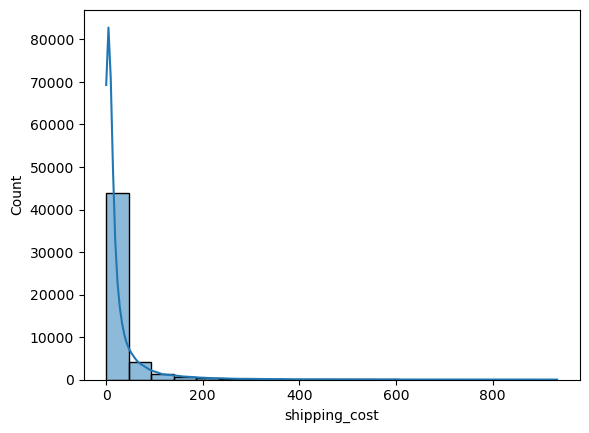

In [108]:
# showing any extreme values for 'shipping_cost'
sns.histplot(subset['shipping_cost'], bins=20, kde = True)

<Axes: xlabel='profit', ylabel='Count'>

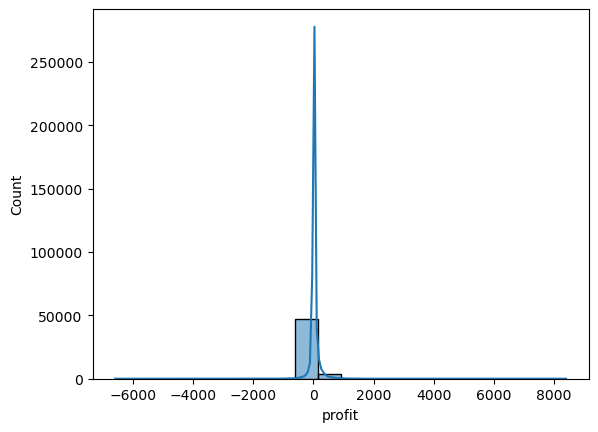

In [113]:
# Check for outliers

sns.histplot(subset['profit'], bins=20, kde = True)

In [116]:
#Checking data types for the variables
subset.dtypes

country           object
sales              int64
profit           float64
shipping_cost    float64
discount         float64
quantity           int64
dtype: object

### 4. Plotting a choropleth map

In [75]:
# Do a folium map with high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

In [79]:
{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": { "name": "Afghanistan" },
      "geometry": {
        "type": "Polygon",
        "coordinates": [ ... ]
      }
    },
    ...
  ]
}

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'name': 'Afghanistan'},
   'geometry': {'type': 'Polygon', 'coordinates': [Ellipsis]}},
  Ellipsis]}

In [84]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geojson, 
    data = data_to_plot,
    columns = ['country', 'profit'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "profit").add_to(map)
folium.LayerControl().add_to(map)

map

Does the analysis answer any of your existing research questions?

The map shows the distribution of profit across countries. The darker the shading, the higher the profit as per the legend. This answers one of the research questions which sought to understand the distribution of profits across countries.

Does the analysis lead you to any new research questions?

Yes, further questions are triggered by the results. For example, if high profits are recorded for distant countries in Africa and Asia, does shipping have any effect on profits?